# Assignment 03 - Jan 22nd, 2018

This notebook presents a simluation of Monty Hall Problem. It demonstrates that switching is always better than staying with your initial guess. 

First of all, the function below was created to perform simulation. 

In [22]:
montyHall <- function(strat='stay', N=100)
{
    doors <- 1:3 #initialize the doors behind one of which is a good prize
    total.win <- 0 #to keep track of number of wins
    d <- NULL # Initalize a dataframe
    
    for(i in 1:N)
    {
      prize <- ceiling(runif(1,0,3)) #randomize which door has the good prize
      guess <- ceiling(runif(1,0,3)) #guess a door at random
      
      ## Reveal one of the doors you didn't pick which has a bum prize
      if(prize != guess)
        reveal <- doors[-c(prize, guess)]
      else
        reveal <- sample(doors[-c(prize)],1)
      
      ## Stay with your initial guess or switch
      if(strat == 'switch')
        select <- doors[-c(reveal, guess)]
      else
        select <- guess
      
      ## Establish the result
      if(select == prize)
        result <- 1
      else 
        result <- 0
      
      ## Count up your wins
      if(select == prize)
        total.win <- total.win+1
      
      ## Create a matrix to keep track of the result of each case 
      d <- rbind(d, data.frame(guess, reveal, prize, select, result, total.win))
    }
    print(d)
    ## Print the win percentage of your strategy
    cat(paste('Using the ',strat,' strategy, your win percentage was ',total.win/N*100,'%\n',sep=''))
}


Now, let's start with running the function for not switching strategy. 

In [23]:
montyHall()

    guess reveal prize select result total.win
1       1      3     2      1      0         0
2       3      1     2      3      0         0
3       2      3     1      2      0         0
4       3      2     3      3      1         1
5       1      2     3      1      0         1
6       2      3     1      2      0         1
7       1      3     1      1      1         2
8       2      1     3      2      0         2
9       1      3     2      1      0         2
10      2      1     3      2      0         2
11      3      1     2      3      0         2
12      3      1     2      3      0         2
13      1      2     3      1      0         2
14      2      1     3      2      0         2
15      3      2     3      3      1         3
16      1      2     3      1      0         3
17      2      3     1      2      0         3
18      1      2     3      1      0         3
19      2      3     1      2      0         3
20      3      1     2      3      0         3
21      1    

As could be seen in the result set, when you simulate the game for 100 times your win percentage for sticking to your initial guess is 28%. 
Now, the simulation is going to be run for switching strategy. 

In [24]:
montyHall(strat='switch')

    guess reveal prize select result total.win
1       2      1     2      3      0         0
2       2      1     3      3      1         1
3       3      1     2      2      1         2
4       2      1     2      3      0         2
5       2      3     2      1      0         2
6       3      2     1      1      1         3
7       3      2     1      1      1         4
8       3      1     2      2      1         5
9       2      3     1      1      1         6
10      1      3     1      2      0         6
11      1      2     1      3      0         6
12      3      1     3      2      0         6
13      2      1     3      3      1         7
14      2      1     2      3      0         7
15      2      3     2      1      0         7
16      2      3     1      1      1         8
17      1      3     2      2      1         9
18      1      3     2      2      1        10
19      3      1     2      2      1        11
20      3      2     1      1      1        12
21      2    

As could be seen in the result set, when you simulate the game for 100 times your win percentage for switching is 70%. It is evident that switching would be the winning strategy in this game.  

Now, histograms of the probabilities of winning a car or goat for each strategy will be presented. The output of the function that was created should be set to numeric value to perform this. So, the text as print out is going to be removed.  

In [26]:
montyHall <- function(strat='stay', N=100)
{
    doors <- 1:3 #initialize the doors behind one of which is a good prize
    win <- 0 #to keep track of number of wins
    d <- NULL # Initalize a dataframe
    
    for(i in 1:N)
    {
      prize <- ceiling(runif(1,0,3)) #randomize which door has the good prize
      guess <- ceiling(runif(1,0,3)) #guess a door at random
      
      ## Reveal one of the doors you didn't pick which has a bum prize
      if(prize != guess)
        reveal <- doors[-c(prize, guess)]
      else
        reveal <- sample(doors[-c(prize)],1)
      
      ## Stay with your initial guess or switch
      if(strat == 'switch')
        select <- doors[-c(reveal, guess)]
      else
        select <- guess
      
      ## Establish the result
      if(select == prize)
        result <- 1
      else 
        result <- 0
      
      ## Count up your wins
      if(select == prize)
        win <- win+1
      
      ## Create a matrix to keep track of the result of each case 
      d <- rbind(d, data.frame(guess, reveal, prize, select, result, win))
    }
    d
}

Now, I should be able to draw histograms of results. I am going to start with the histogram of results in not switching strategy. The simulation is going to be run for 1000 times to be more accurate. 

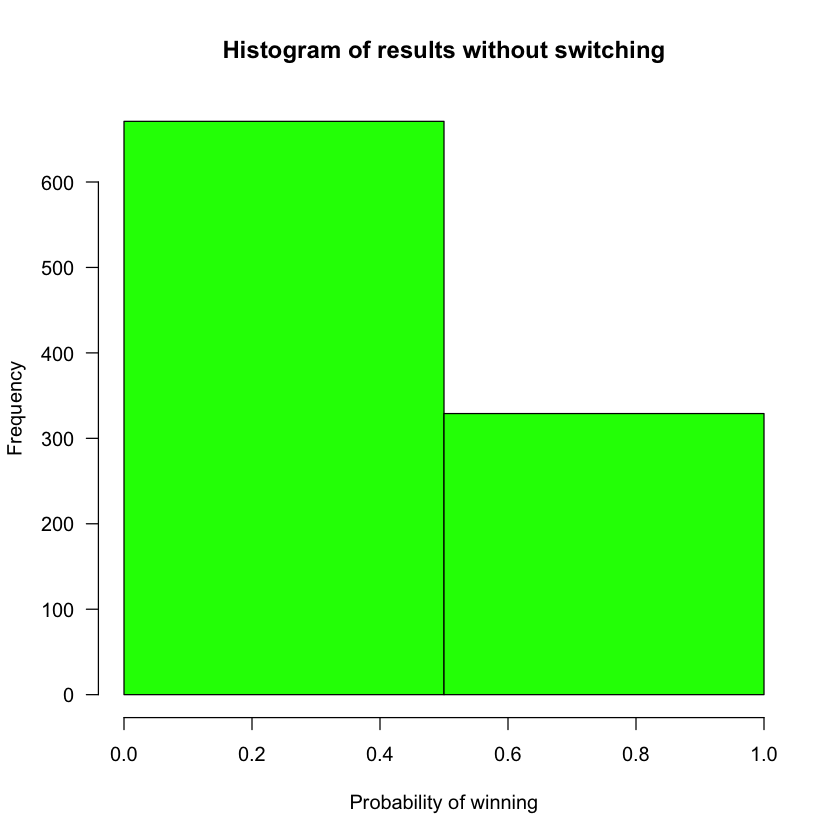

In [8]:
hist(montyHall(N=1000)$result, 
     main='Histogram of results without switching', 
     col="green",  xlim=c(0,1), 
     xlab='Probability of winning', las=1, 
     breaks=2)

Let's present the histogram for switching strategy as well.

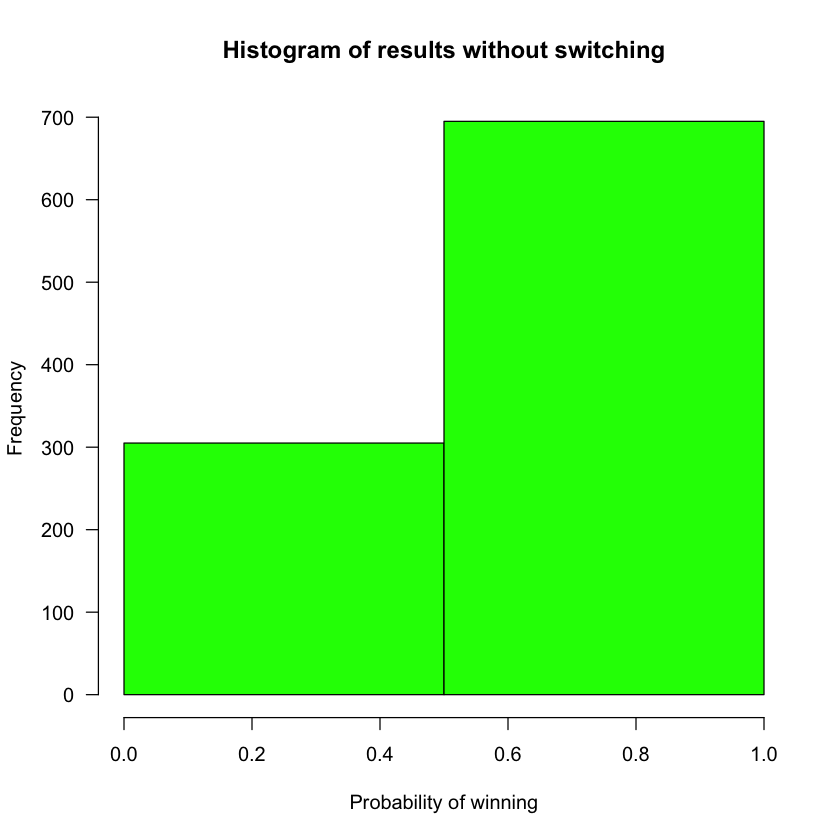

In [9]:
hist(montyHall(strat='switch', N=1000)$result, 
     main='Histogram of results without switching', 
     col="green",  xlim=c(0,1), 
     xlab='Probability of winning', las=1, 
     breaks=2)

As could be seen in histograms for both switching and not switching cases, switching startegy would more likely lead to winning results. 

As the final step, summary statistics is presented below. 

In [30]:
summary(montyHall())
var(montyHall())

     guess          reveal         prize          select         result    
 Min.   :1.00   Min.   :1.00   Min.   :1.00   Min.   :1.00   Min.   :0.00  
 1st Qu.:1.00   1st Qu.:1.00   1st Qu.:1.00   1st Qu.:1.00   1st Qu.:0.00  
 Median :2.00   Median :2.00   Median :2.00   Median :2.00   Median :0.00  
 Mean   :1.98   Mean   :2.05   Mean   :2.01   Mean   :1.98   Mean   :0.33  
 3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:1.00  
 Max.   :3.00   Max.   :3.00   Max.   :3.00   Max.   :3.00   Max.   :1.00  
      win       
 Min.   : 1.00  
 1st Qu.: 7.00  
 Median :13.50  
 Mean   :15.52  
 3rd Qu.:24.00  
 Max.   :33.00  

,guess,reveal,prize,select,result,win
guess,0.58222222,-0.295959596,0.07191919,0.58222222,0.020404040,0.44222222
reveal,-0.29595960,0.714646465,-0.39292929,-0.29595960,-0.006565657,0.03686869
prize,0.07191919,-0.392929293,0.68646465,0.07191919,0.047070707,0.31050505
select,0.58222222,-0.295959596,0.07191919,0.58222222,0.020404040,0.44222222
result,0.02040404,-0.006565657,0.04707071,0.02040404,0.223333333,0.37666667
win,0.44222222,0.036868687,0.31050505,0.44222222,0.376666667,111.34656566


In [31]:
summary(montyHall(strat='switch'))
var(montyHall(strat='switch'))

     guess       reveal         prize          select         result    
 Min.   :1   Min.   :1.00   Min.   :1.00   Min.   :1.00   Min.   :0.00  
 1st Qu.:1   1st Qu.:1.00   1st Qu.:1.00   1st Qu.:1.00   1st Qu.:0.00  
 Median :2   Median :2.00   Median :2.00   Median :2.00   Median :1.00  
 Mean   :2   Mean   :2.05   Mean   :1.94   Mean   :1.95   Mean   :0.63  
 3rd Qu.:3   3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:3.00   3rd Qu.:1.00  
 Max.   :3   Max.   :3.00   Max.   :3.00   Max.   :3.00   Max.   :1.00  
      win       
 Min.   : 0.00  
 1st Qu.:15.75  
 Median :31.50  
 Mean   :31.54  
 3rd Qu.:46.25  
 Max.   :63.00  

,guess,reveal,prize,select,result,win
guess,0.636363636,-0.27777778,-0.006060606,-0.358585859,-0.021212121,-0.14747475
reveal,-0.277777778,0.63383838,-0.331313131,-0.356060606,0.029797980,0.70404040
prize,-0.006060606,-0.33131313,0.705454545,0.337373737,-0.076363636,0.01050505
select,-0.358585859,-0.35606061,0.337373737,0.714646465,-0.008585859,-0.55656566
result,-0.021212121,0.02979798,-0.076363636,-0.008585859,0.240303030,-0.16020202
win,-0.147474747,0.70404040,0.010505051,-0.556565657,-0.160202020,325.50747475
